# Importação de bibliotecas

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from classifiers.bayesian_classifier import BayesianGaussianClassifier
from utils.classifier_utils import ClassifierUtils
from utils.dataset_utils import DatasetUtils
from utils.image_generator import ImageGenerator

# Definição de constantes

In [2]:
np.random.seed(42)
CLASSIFIER_NAME = "Bayesian Gaussian"
TARGET_COLUMN_NAME = "class"
DATASET_NAME = "Coluna"
TEST_SIZE = 0.2
HOLDOUT_INDEXES_NUMBER = 200
FIG_SIZE = (12, 10)
IMAGE_FONT_SIZE = 20
RESOLUTION_POINTS = 1000

# Baixando dataset Coluna

In [3]:
vertebral_column = fetch_ucirepo(id=212)

X_coluna = vertebral_column.data.features
y_coluna = vertebral_column.data.targets

coluna_df = pd.concat([X_coluna, y_coluna], axis="columns")

In [4]:
list(coluna_df[TARGET_COLUMN_NAME].unique())

['Hernia', 'Spondylolisthesis', 'Normal']

# Redefinindo classes para valores numéricos

In [ ]:
class_mapping = {"Hernia": 0, "Spondylolisthesis": 1, "Normal": 2}
coluna_df[TARGET_COLUMN_NAME] = coluna_df[TARGET_COLUMN_NAME].map(class_mapping)
coluna_df[TARGET_COLUMN_NAME]

0      0
1      0
2      0
3      0
4      0
      ..
305    2
306    2
307    2
308    2
309    2
Name: class, Length: 310, dtype: int64

# Treinamento e avaliação dos modelos, juntamente com a criação de tabela de métricas para o classificador Bayesiano

In [17]:
bayesian_holdout_indexes = ClassifierUtils.create_multiple_holdout_indexes(
    df=coluna_df, n_indexes=HOLDOUT_INDEXES_NUMBER, test_size=TEST_SIZE
)

bayesian_accuracy_list = []

for train_indexes, test_indexes in bayesian_holdout_indexes:
    X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
        df=coluna_df,
        train_indexes=train_indexes,
        test_indexes=test_indexes,
        target_column_name=TARGET_COLUMN_NAME,
    )

    classifier = BayesianGaussianClassifier(normalization=True)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test=X_test)

    accuracy = ClassifierUtils.calculate_accuracy(y_true=y_test, y_pred=y_pred)
    error_rate = ClassifierUtils.calculate_error_rate(y_true=y_test, y_pred=y_pred)

    confusion_matrix_result = ClassifierUtils.confusion_matrix(
        y_true=y_test, y_pred=y_pred
    )

    bayesian_accuracy_list.append(
        (
            accuracy,
            error_rate,
            train_indexes,
            test_indexes,
            y_pred,
            confusion_matrix_result,
        )
    )

bayesian_df_results = pd.DataFrame(
    bayesian_accuracy_list,
    columns=[
        "accuracy",
        "error_rate",
        "train_indexes",
        "test_indexes",
        "y_pred",
        "confusion_matrix",
    ],
)

bayesian_df_results

,accuracy,error_rate,train_indexes,test_indexes,y_pred,confusion_matrix
0,0.838710,0.161290,"[236, 252, 228, 222, 154, 204, 107, 89, 125, 87, 124, 289, 245, 285, 160, 30, 281, 213, 303, 241, 86, 165, 98, 207, 132, 68, 180, 249, 27, 106, 34, 109, 5, 226, 211, 242, 56, 31, 274, 295, 243, 290, 134, 264, 10, 64, 65, 291, 23, 235, 112, 171, 71, 238, 283, 119, 52, 279, 145, 292, 233, 90, 151, 14, 38, 269, 206, 136, 80, 307, 183, 179, 199, 49, 255, 54, 51, 150, 232, 287, 159, 195, 97, 108, 48, 16, 231, 135, 116, 66, 17, 220, 57, 286, 304, 182, 218, 110, 22, 36, ...]","[0, 129, 257, 6, 8, 9, 138, 140, 141, 142, 15, 273, 146, 21, 277, 278, 284, 29, 288, 161, 163, 164, 167, 296, 41, 172, 47, 177, 50, 305, 306, 309, 55, 184, 188, 190, 191, 192, 193, 200, 74, 76, 77, 205, 79, 81, 209, 210, 84, 85, 212, 215, 216, 217, 92, 221, 225, 227, 102, 114, 250, 127]","[0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1]","[[7, 1, 3], [0, 31, 1], [5, 0, 14]]"
1,0.887097,0.112903,"[272, 169, 132, 74, 88, 170, 34, 228, 181, 284, 38, 27, 136, 193, 25, 200, 282, 232, 205, 109, 234, 128, 58, 208, 224, 253, 120, 10, 65, 50, 98, 22, 144, 177, 149, 268, 62, 203, 26, 183, 278, 172, 246, 32, 233, 46, 236, 96, 142, 53, 196, 225, 49, 255, 216, 17, 159, 271, 265, 107, 308, 7, 182, 151, 47, 20, 260, 137, 35, 293, 238, 29, 15, 304, 185, 157, 114, 119, 222, 243, 210, 300, 307, 11, 239, 80, 79, 140, 229, 187, 176, 52, 171, 227, 6, 78, 90, 93, 135, 242, ...]","[2, 3, 5, 133, 134, 261, 264, 267, 269, 14, 274, 19, 276, 277, 150, 24, 153, 280, 28, 286, 287, 33, 36, 164, 166, 39, 292, 294, 173, 179, 180, 64, 195, 197, 71, 72, 75, 76, 207, 81, 83, 84, 85, 211, 212, 214, 215, 217, 91, 219, 95, 97, 226, 99, 230, 105, 110, 241, 116, 248, 122, 254]","[2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2]","[[8, 0, 2], [1, 28, 0], [4, 0, 19]]"
2,0.854839,0.145161,"[250, 242, 215, 124, 223, 110, 243, 168, 245, 6, 1, 34, 300, 307, 170, 77, 49, 240, 67, 52, 175, 259, 100, 12, 139, 279, 194, 203, 164, 63, 59, 123, 138, 290, 272, 127, 237, 109, 61, 201, 224, 218, 220, 306, 43, 16, 79, 14, 93, 83, 39, 41, 267, 137, 162, 80, 231, 11, 141, 258, 134, 189, 26, 173, 277, 76, 118, 96, 293, 50, 128, 197, 238, 84, 256, 260, 3, 129, 208, 135, 305, 241, 274, 244, 27, 287, 140, 136, 263, 251, 229, 154, 219, 75, 214, 114, 149, 88, 113, 133, ...]","[257, 130, 131, 4, 7, 8, 264, 10, 266, 13, 143, 271, 18, 20, 148, 278, 23, 280, 283, 285, 33, 35, 163, 37, 38, 165, 292, 169, 294, 297, 44, 172, 174, 299, 302, 303, 179, 53, 181, 188, 62, 191, 66, 199, 200, 73, 204, 211, 85, 216, 91, 92, 94, 101, 106, 107, 234, 112, 115, 121, 253, 254]","[2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2]","[[10, 0, 4], [0, 28, 1], [4, 0, 15]]"
3,0.870968,0.129032,"[20, 50, 213, 125, 49, 159, 257, 192, 268, 17, 133, 157, 264, 200, 209, 258, 101, 30, 272, 300, 139, 23, 206, 56, 27, 146, 280, 73, 83, 173, 259, 96, 51, 305, 275, 10, 98, 9, 84, 138, 261, 182, 187, 271, 235, 184, 53, 136, 111, 284, 15, 78, 188, 279, 299, 41, 24, 21, 274, 58, 207, 203, 59, 201, 196, 232, 66, 239, 202, 48, 13, 216, 266, 54, 70, 32, 270, 109, 245, 233, 52, 195, 43, 211, 179, 212, 127, 38, 307, 186, 1, 2, 269, 229, 149, 97, 5, 117, 62, 134, ...]","[128, 129, 256, 132, 262, 263, 141, 14, 145, 18, 147, 276, 22, 152, 28, 286, 33, 161, 35, 36, 37, 163, 167, 40, 168, 170, 292, 293, 298, 174, 181, 309, 55, 57, 63, 64, 65, 191, 193, 75, 77, 80, 208, 82, 85, 214, 87, 221, 94, 223, 225, 226, 249, 105, 107, 110, 240, 114, 244, 246, 121, 124]","[1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1

# Vetor de acurácias

In [7]:
bayesian_accuracy_vector = pd.Series(bayesian_df_results["accuracy"])

In [8]:
bayesian_accuracy_vector

0      0.241935
1      0.500000
2      0.274194
3      0.193548
4      0.209677
         ...   
195    0.161290
196    0.387097
197    0.177419
198    0.193548
199    0.225806
Name: accuracy, Length: 200, dtype: float64

# Definindo gerador de imagens

In [9]:
image_generator = ImageGenerator(figure_size=FIG_SIZE, font_size=IMAGE_FONT_SIZE)

# Boxplot das acurácias do classificador Bayesiano

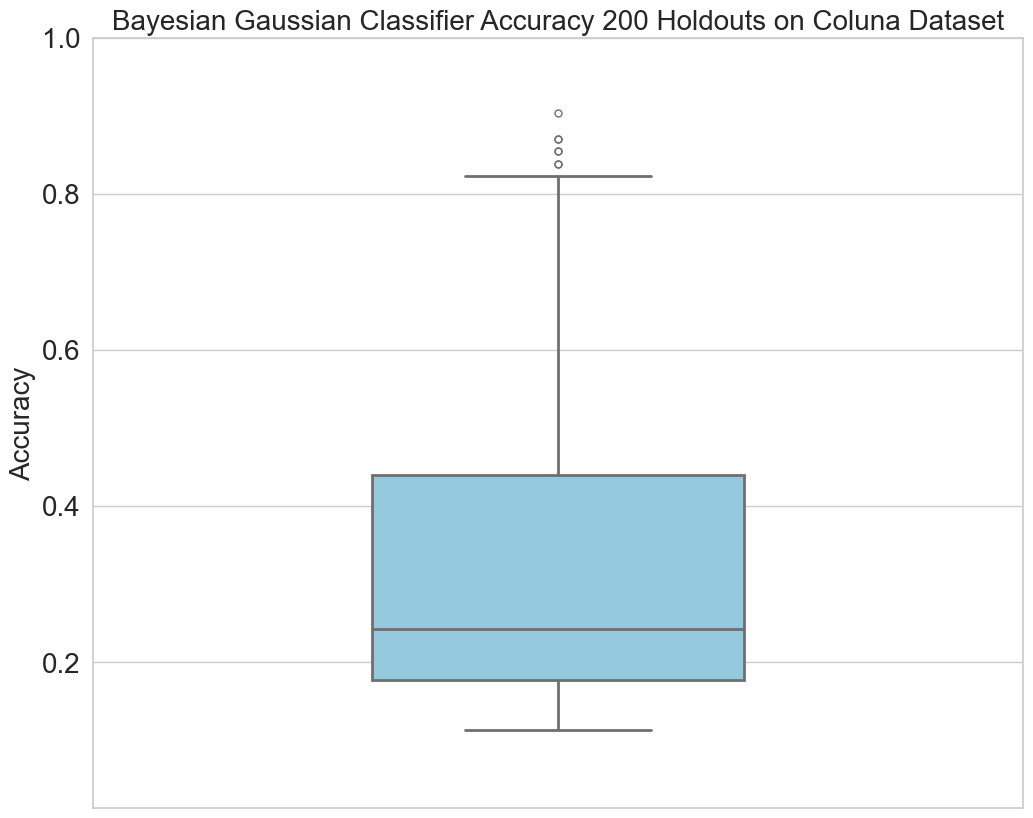

In [10]:
image_generator.create_boxplot(
    vector_distribution=bayesian_accuracy_vector,
    y_label="Accuracy",
    image_title=f"{CLASSIFIER_NAME} Classifier Accuracy {HOLDOUT_INDEXES_NUMBER} Holdouts on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/iris_bayesian_accuracy_boxplot.jpeg",
    show=True,
)

# Baseado na melhor acurácia, pego os índices de treino e teste que geraram ela e calculo a superfície de decisão e também resgato a sua respectiva matriz de confusão

In [11]:
max_accuracy = bayesian_df_results["accuracy"].max()
indexes_of_max_accuracy = bayesian_df_results[
    bayesian_df_results["accuracy"] == max_accuracy
].index.tolist()

index_selected = np.random.choice(indexes_of_max_accuracy)

print(f"Índice(s) com melhor acurácia: {indexes_of_max_accuracy}")
print(f"Índice selecionado aleatoriamente: {index_selected}")
print(f"Acurácia do índice selecionado: {max_accuracy * 100:.2f}%")

best_accuracy_train_indexes = bayesian_df_results.loc[index_selected, "train_indexes"]
best_accuracy_test_indexes = bayesian_df_results.loc[index_selected, "test_indexes"]

X_train, y_train, X_test, y_test = ClassifierUtils.separate_train_test(
    df=coluna_df,
    train_indexes=best_accuracy_train_indexes,
    test_indexes=best_accuracy_test_indexes,
    target_column_name=TARGET_COLUMN_NAME,
)

Índice(s) com melhor acurácia: [173]
Índice selecionado aleatoriamente: 173
Acurácia do índice selecionado: 90.32%


# Resgatando a matriz de confusão e plotando ela

In [12]:
confusion_matrix_result = bayesian_df_results.loc[index_selected, "confusion_matrix"]

In [13]:
confusion_matrix_result

array([[ 9,  0,  2],
       [ 0, 31,  0],
       [ 4,  0, 16]])

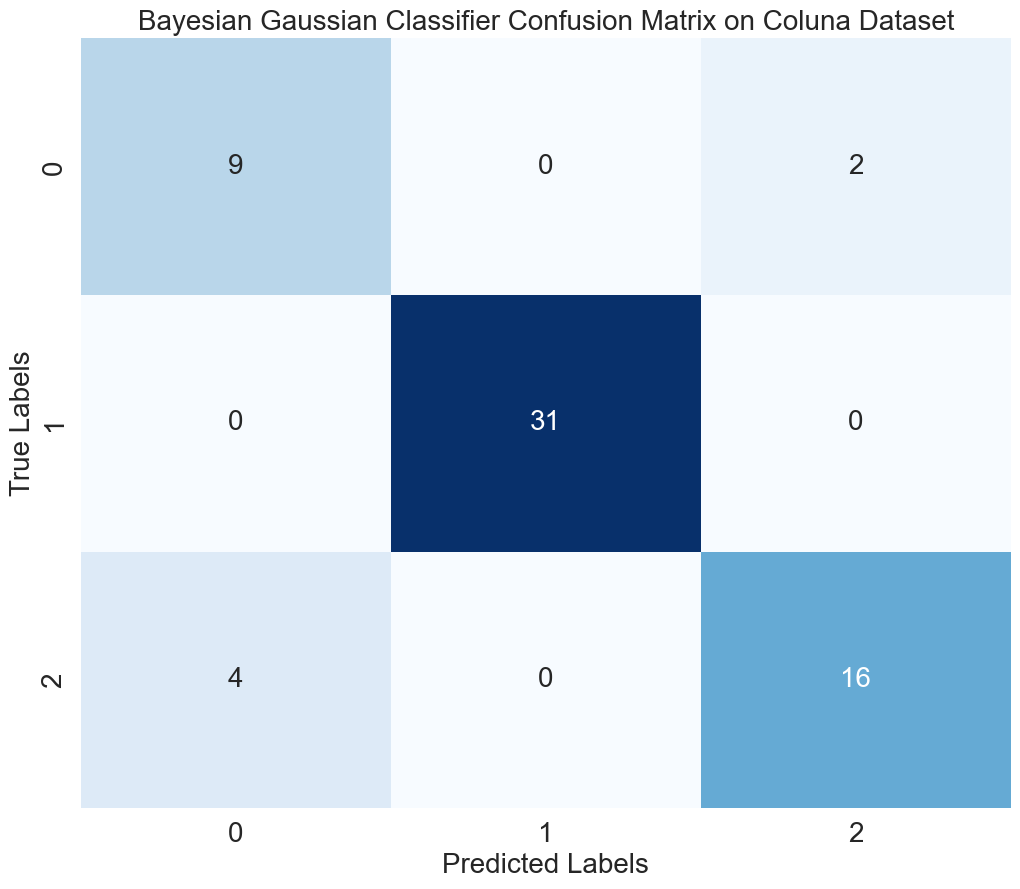

In [14]:
image_generator.create_confusion_matrix_heatmap(
    confusion_matrix=confusion_matrix_result,
    x_label="Predicted Labels",
    y_label="True Labels",
    image_title=f"{CLASSIFIER_NAME} Classifier Confusion Matrix on {DATASET_NAME} Dataset",
    path_to_save="../../data/images/atividade_2/iris_bayesian_confusion_matrix.jpeg",
    show=True,
)

# Calculo de superfície de decisão para o classificador Bayesiano baseado em duas features

In [18]:
feature_x = X_train.columns[0]
feature_y = X_train.columns[1]

test_grid, x_shape, y_shape = DatasetUtils.create_test_grid(
    X_train=X_train,
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    return_shapes=True,
)

classifier = BayesianGaussianClassifier(normalization=True)
classifier.fit(X_train[[feature_x, feature_y]], y_train)

y_pred_test_grid = classifier.predict(test_grid)

y_pred_test_grid = y_pred_test_grid.reshape(x_shape)

# Plot da superfície de decisão para o classificador Bayesiano

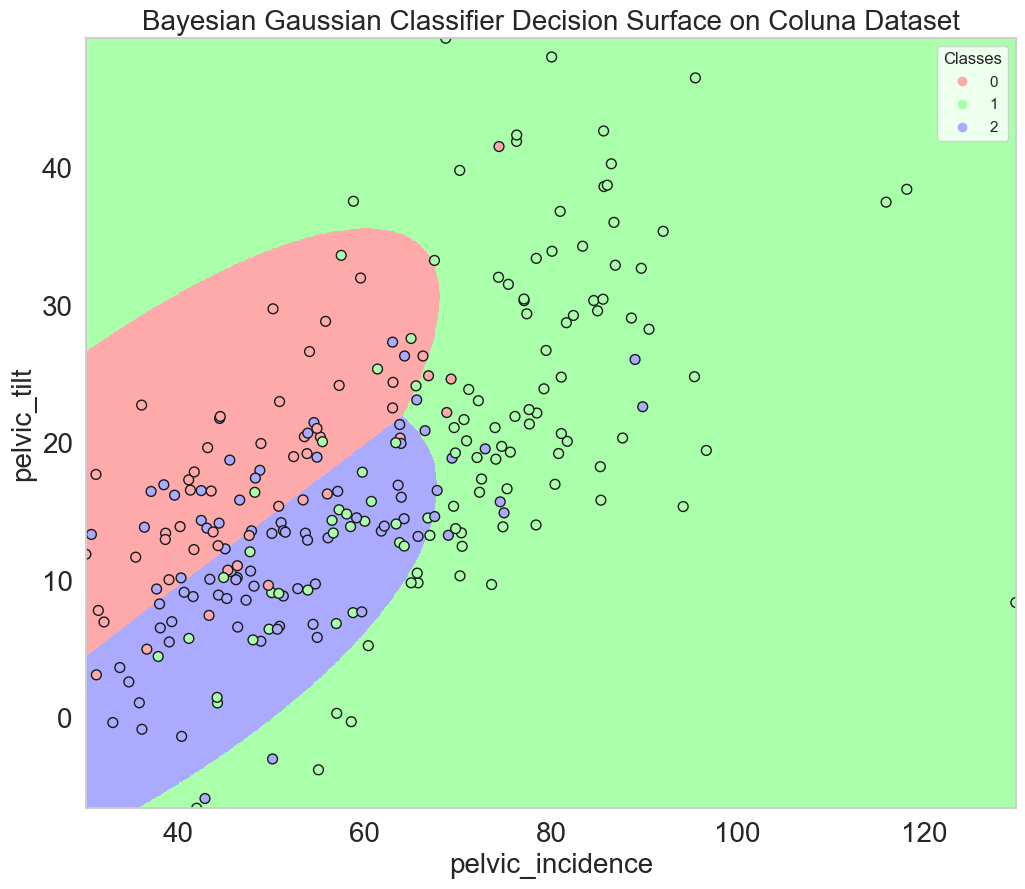

In [19]:
image_generator.create_decision_surface(
    X_train=X_train,
    y_train=y_train,
    y_pred=y_pred_test_grid,
    image_title=f"{CLASSIFIER_NAME} Classifier Decision Surface on {DATASET_NAME} Dataset",
    feature_x=feature_x,
    feature_y=feature_y,
    resolution_points=RESOLUTION_POINTS,
    path_to_save="../../data/images/atividade_2/iris_bayesian_decision_surface.jpeg",
    show=True,
)